In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np

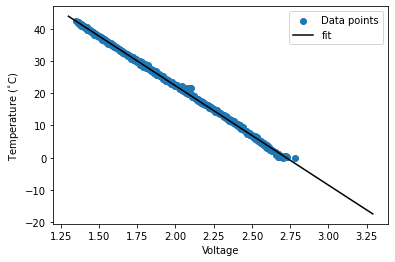

array([-30.79759812,  83.90646865])

In [8]:
def R_T(Vin, Vout, R1):
    return (-Vout * R1) / (Vout - Vin)

def temperature(Vout, K0, K1, K2):
    R = R_T(3.3, Vout, 15000)
    return 1 / (K0 + K1 * np.log(R) + K2 * np.log(R)**3)

def linear(Vin,a,b):
    return a*Vin + b
#     return -30.9*Vin +  84.5

df = pd.read_csv("temperature.csv")
xdata = df["Voltage"]
ydata = df["Temperature"]
x = np.linspace(1.3, 3.29)
plt.figure()
popt, pcov = curve_fit(linear, xdata, ydata)
plt.scatter(xdata, ydata, label="Data points")
plt.plot(x, linear(x, *popt), c="k", label="fit")
plt.legend()
plt.xlabel("Voltage")
plt.ylabel("Temperature ($^{\circ}$C)")
plt.savefig("temperature-calibration.pdf", format="pdf")
plt.show();

# np.mean(ydata - linear(xdata, *popt))
popt

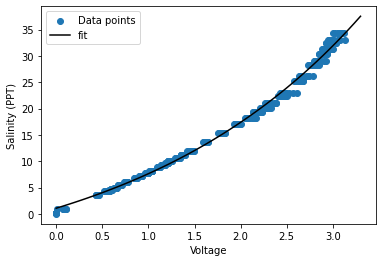

array([ 13.40770246,   0.39797497, -12.32516883])

In [9]:
def R_T(Vin, Vout, R1):
    return (-Vout * R1) / (Vout - Vin)

def temperature(Vout, K0, K1, K2):
    R = R_T(3.3, Vout, 15000)
    return 1 / (K0 + K1 * np.log(R) + K2 * np.log(R)**3)

def func(Vin,a,b,c):
#     return a*Vin + b
    return a*np.exp(b*Vin)+c
#     return a * (Vin + b)+c
#     return -30.9*Vin +  84.5

df = pd.read_csv("salinity.csv")
xdata = df["Voltage"]
ydata = df["Salinity"]
x = np.linspace(0, 3.3)
plt.figure()
popt, pcov = curve_fit(func, xdata, ydata)
plt.scatter(xdata, ydata, label="Data points")
plt.plot(x, func(x, *popt), c="k", label="fit")
plt.xlabel("Voltage")
plt.ylabel("Salinity (PPT)")
plt.legend()
plt.savefig("salinity-calibration.pdf", format="pdf")
plt.show();
popt